# Homework 4 Part B
## Ruth Iang
## 02/26/2022

## Question #1

In [63]:
import pandas as pd

data_url = "https://raw.githubusercontent.com/DATA-690-SPRING-2022/WANG/main/assignment_04/census_costs.txt"

In [64]:
df = pd.read_table(data_url, skiprows=1)        

df.head()    #shows us the top rows of the table

,Census Year,Total Population,Census Cost,Average Cost Per Person
0,1790,"3,929,214","$44,377",1.13 cents
1,1800,"5,308,483","$66,109",1.24 cents
2,1810,"7,239,881","$178,445",2.46 cents
3,1820,"9,633,822","$208,526",2.16 cents
4,1830,"12,866,020","$378,545",2.94 cents


## Question #2

In [65]:
df.shape #4 rows and 23 columns

(23, 4)

## Question #3

In [66]:
df.head (10)

,Census Year,Total Population,Census Cost,Average Cost Per Person
0,1790,"3,929,214","$44,377",1.13 cents
1,1800,"5,308,483","$66,109",1.24 cents
2,1810,"7,239,881","$178,445",2.46 cents
3,1820,"9,633,822","$208,526",2.16 cents
4,1830,"12,866,020","$378,545",2.94 cents
5,1840,"17,069,458","$833,371",4.88 cents
6,1850,"23,191,876","$1,423,351",6.14 cents
7,1860,"31,443,321","$1,969,377",6.26 cents
8,1870,"38,558,371","$3,421,198",8.87 cents
9,1880,"50,155,783","$5,790,678",11.54 cents


In [67]:
df.tail(10)   

,Census Year,Total Population,Census Cost,Average Cost Per Person
13,1920,"105,710,620","$25,117,000",23.76 cents
14,1930,"122,775,046","$40,156,000",32.71 cents
15,1940,"131,669,275","$67,527,000",51.29 cents
16,1950,"151,325,798","$91,462,000",60.44 cents
17,1960,"179,323,175","$127,934,000",71.34 cents
18,1970,"203,302,031","$247,653,000",$1.22
19,1980,"226,542,199","$1,078,488,000",$4.76
20,1990,"248,718,301","$2,492,830,000",$10.02
21,2000,"281,421,906",$4.5 Billion,$15.99
22,2010*,"308,745,538",$13 Billion,$42.11


In [68]:
df.sample(n=10)

,Census Year,Total Population,Census Cost,Average Cost Per Person
5,1840,"17,069,458","$833,371",4.88 cents
8,1870,"38,558,371","$3,421,198",8.87 cents
10,1890,"62,979,766","$11,547,127",18.33 cents
22,2010*,"308,745,538",$13 Billion,$42.11
15,1940,"131,669,275","$67,527,000",51.29 cents
0,1790,"3,929,214","$44,377",1.13 cents
19,1980,"226,542,199","$1,078,488,000",$4.76
7,1860,"31,443,321","$1,969,377",6.26 cents
13,1920,"105,710,620","$25,117,000",23.76 cents
6,1850,"23,191,876","$1,423,351",6.14 cents


## Question #4

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Census Year              23 non-null     object
 1   Total Population         23 non-null     object
 2   Census Cost              23 non-null     object
 3   Average Cost Per Person  23 non-null     object
dtypes: object(4)
memory usage: 864.0+ bytes


## Question #5

In [70]:
df.describe()  

,Census Year,Total Population,Census Cost,Average Cost Per Person
count,23,23,23,23
unique,23,23,23,23
top,1790,"3,929,214","$44,377",1.13 cents
freq,1,1,1,1


## Question #6

In [71]:
def cleanse_year(year_list):                     #creates a function for a clean version of year
    if "*" in year_list:                         #if * is in year_str, replace it with nothing in it
        year = year_list.replace("*","")
    else:
        year = year_list                         # if * is not there, then assume the list given by year_str
        
    return int(year)

In [72]:
df["year_cleansed"] = df["Census Year"].apply(cleanse_year)            

df["year_cleansed"] 

0     1790
1     1800
2     1810
3     1820
4     1830
5     1840
6     1850
7     1860
8     1870
9     1880
10    1890
11    1900
12    1910
13    1920
14    1930
15    1940
16    1950
17    1960
18    1970
19    1980
20    1990
21    2000
22    2010
Name: year_cleansed, dtype: int64

In [73]:
def cleanse_pop(pop_list):                              #creates function for cleaning pop
  if "," in pop_list:                                   # if comma is in the list, replace it with nothing in it
    pop = pop_list.replace(",","")
  else:
    pop = pop_list                                      #if nothing is there, return the original list
  return int(pop)

In [74]:
df["pop_cleansed"] = df["Total Population"].apply(cleanse_pop)

df["pop_cleansed"]     

0       3929214
1       5308483
2       7239881
3       9633822
4      12866020
5      17069458
6      23191876
7      31443321
8      38558371
9      50155783
10     62979766
11     76303387
12     91972266
13    105710620
14    122775046
15    131669275
16    151325798
17    179323175
18    203302031
19    226542199
20    248718301
21    281421906
22    308745538
Name: pop_cleansed, dtype: int64

In [99]:
def cleanse_cost(cost_list):
    cost_list = cost_list.replace("$","")
    cost_list = cost_list.replace(",","")
    if "Billion" in cost_list:                           
        cost_list = cost_list.replace("Billion","")       
        cost_list = cost_list.replace("4.5","4500000000")
        cost = cost_list.replace("13","13000000000")
    else:                                               
        cost = cost_list
    return (cost)

        
df["cost_cleansed"] = df["Census Cost"].apply(cleanse_cost)

df["cost_cleansed"]  

0            44377
1            66109
2           178445
3           208526
4           378545
5           833371
6          1423351
7          1969377
8          3421198
9          5790678
10        11547127
11        11854000
12        15968000
13        25117000
14        40156000
15        67527000
16        91462000
17       127934000
18       247653000
19      1078488000
20      2492830000
21     4500000000 
22    13000000000 
Name: cost_cleansed, dtype: object

In [100]:
df["cost_cleansed"] = df["cost_cleansed"].astype(int)         # changes data type to integers

In [101]:
def cleanse_avg_cost_per_person(avg_list):              # function to clean avg. cost per person
    if "$" in avg_list:                                 # if $ is in the avg_list
        avg_cost = avg_list.replace("$","")             # replace it with nothing there
    elif "cents" in avg_list:                           # if cents is in avg_list
        avg_cost = avg_list.replace("cents","")       
        avg_cost = float(avg_cost)/100                  # change the avg_cost to float and divide it by 100 to make it all dollars
    else:                                               # if there is nothing to replace, return original list
        avg_cost = avg_list
    return (avg_cost)

In [102]:
df["avg_cost_cleansed"] = df["Average Cost Per Person"].apply(cleanse_avg_cost_per_person)

df["avg_cost_cleansed"]  

0     0.0113
1     0.0124
2     0.0246
3     0.0216
4     0.0294
5     0.0488
6     0.0614
7     0.0626
8     0.0887
9     0.1154
10    0.1833
11    0.1554
12    0.1707
13    0.2376
14    0.3271
15    0.5129
16    0.6044
17    0.7134
18      1.22
19      4.76
20     10.02
21     15.99
22     42.11
Name: avg_cost_cleansed, dtype: object

In [103]:
df["avg_cost_cleansed"] = df["avg_cost_cleansed"].astype(float) 

## Question #7

In [104]:
df.describe()                # summary statistics of the columns

,year_cleansed,pop_cleansed,cost_cleansed,avg_cost_cleansed
count,23.0000,2.300000e+01,2.300000e+01,23.000000
mean,1900.0000,1.039211e+08,9.445587e+08,3.368739
std,67.8233,9.622629e+07,2.830037e+09,9.278241
min,1790.0000,3.929214e+06,4.437700e+04,0.011300
25%,1845.0000,2.013067e+07,1.128361e+06,0.055100
50%,1900.0000,7.630339e+07,1.185400e+07,0.170700
75%,1955.0000,1.653245e+08,1.096980e+08,0.658900
max,2010.0000,3.087455e+08,1.300000e+10,42.110000


## Question #8

<AxesSubplot:xlabel='Year', ylabel='Avg Cost per Person'>

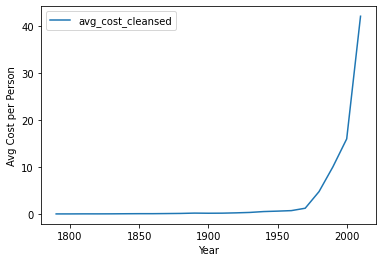

In [105]:
df.plot(x= "year_cleansed", y= "avg_cost_cleansed", xlabel= "Year", ylabel= "Avg Cost per Person")
# allows plotting of year and avg cost per person

## Question #9

<AxesSubplot:xlabel='Total Population', ylabel='Total Cost'>

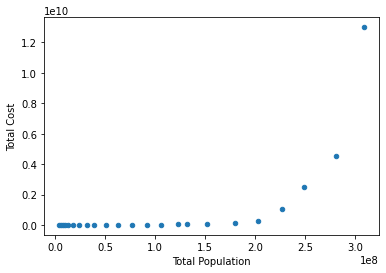

In [106]:
df.plot.scatter(x= "pop_cleansed", y= "cost_cleansed", xlabel= "Total Population", ylabel= "Total Cost")
# allows plotting of pop and cost after cleaning data